# Advertising Budgets and Sales: A Predictive Linear Regression Machine Learning Project

*Sections in this project:*
1. Preparation
2. Data Preprocessing
3. Correlations
4. Data Splitting
5. Linear Regression Model Development
6. Predictions
7. Evaluations
8. Model #2: Development, Predictions, and Evaluations


## Preparation

In [3]:
#install packages
install.packages("randomForest")
install.packages("corrplot")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("caret")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyverse")

#load packages
library(tidyverse)
library(rpart)
library(randomForest)
library(ggplot2)
library(corrplot)
library(caret)
library(rpart.plot)
library(dplyr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to f

## Data Preprocessing

In [4]:
ad_data <- read_csv("Advertising Budget and Sales.csv")

New names:
• `` -> `...1`
Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): ...1, TV Ad Budget, Radio Ad Budget, Newspaper Ad Budget, Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#print summary of the diabetes data
summary(ad_data)

      ...1         TV Ad Budget    Radio Ad Budget  Newspaper Ad Budget
 Min.   :  1.00   Min.   :  0.70   Min.   : 0.000   Min.   :  0.30     
 1st Qu.: 50.75   1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75     
 Median :100.50   Median :149.75   Median :22.900   Median : 25.75     
 Mean   :100.50   Mean   :147.04   Mean   :23.264   Mean   : 30.55     
 3rd Qu.:150.25   3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10     
 Max.   :200.00   Max.   :296.40   Max.   :49.600   Max.   :114.00     
     Sales      
 Min.   : 1.60  
 1st Qu.:10.38  
 Median :12.90  
 Mean   :14.02  
 3rd Qu.:17.40  
 Max.   :27.00  

In [6]:
#count number of missing data
sum(is.na(ad_data))

[1] 0

## Correlations

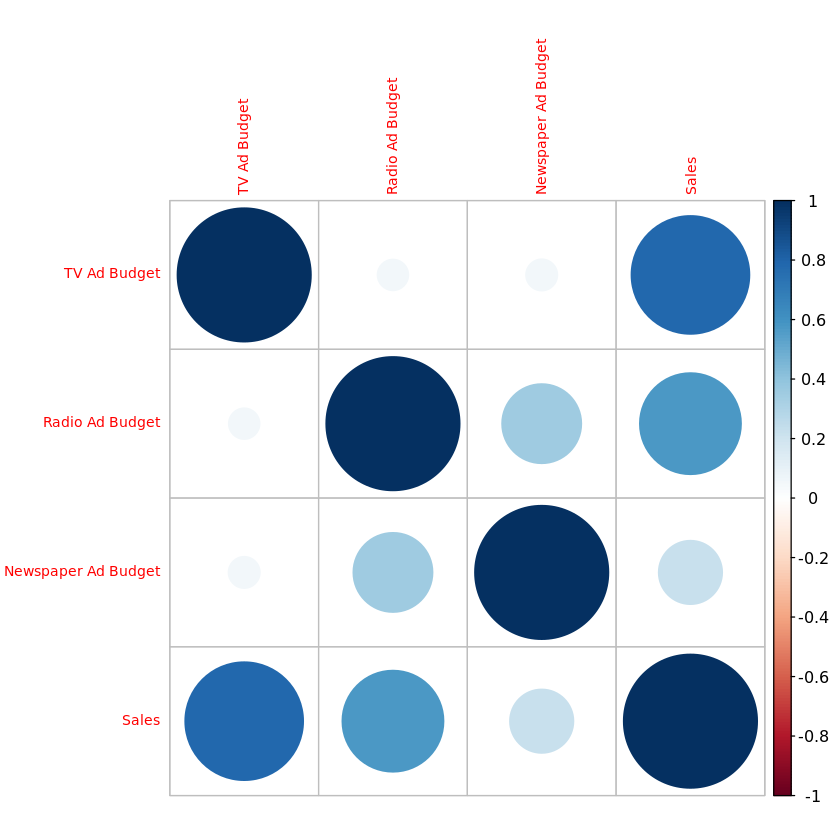

In [7]:
#correlations of each variable
correlation_matrix <- cor(ad_data [,-1]) #exclude ID
corrplot(correlation_matrix, method = "circle", tl.cex = 0.7) #to make sure plot fits


## Data Splitting

In [8]:
#Splitting the data into a training set and a testing set (70% training, 30% testing)
trainIndex <- createDataPartition(ad_data$Sales, p = 0.7, list = FALSE)
trainData <- ad_data[trainIndex, ]
testData <- ad_data[-trainIndex, ]

## Linear Regression Model Development

In [9]:
# Linear regression model
linear_model <- lm(Sales ~ `TV Ad Budget` + `Radio Ad Budget` + `Newspaper Ad Budget`, data = trainData)


## Predictions

In [10]:
#predicting
predictions <- predict(linear_model, testData)

## Evaluations

In [11]:
#Evaluation
mse <- mean((predictions - testData$Sales)^2)
rmse <- sqrt(mse)

cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Mean Squared Error (MSE): 2.58718 
Root Mean Squared Error (RMSE): 1.608471 


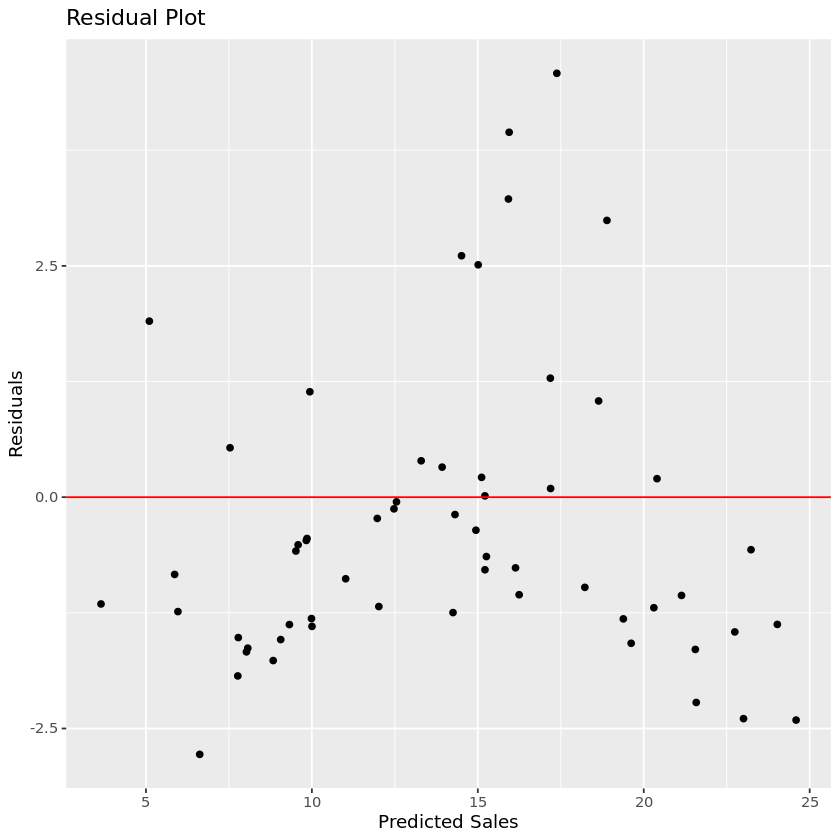

In [12]:
#Plot residuals for the test set
residuals <- predictions - testData$Sales
ggplot(data.frame(predictions, residuals), aes(x = predictions, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, color = 'red') +
  labs(title = "Residual Plot", x = "Predicted Sales", y = "Residuals")


In [13]:
#Check R-squared value on test data
cat("R-squared on Test Data:", 1 - sum(residuals^2) / sum((testData$Sales - mean(testData$Sales))^2), "\n")


R-squared on Test Data: 0.9145474 


An R-squared of 0.91 tells us that 91% of the variation of sales is attributable to the different budget areas. This tells us that this model fits the data well. It can be safe to assume that the budget amounts in each area can help predict the number of sales. 

## Model #2: Development, Predictions, and Evaluations

In [14]:
#Let's fit another model just to compare performance
linear_model2 <- lm(Sales ~ `TV Ad Budget` + `Radio Ad Budget`, data = trainData)


In [15]:
#predicting
predictions2 <- predict(linear_model2, testData)


In [16]:
#Evaluation
mse2 <- mean((predictions2 - testData$Sales)^2)
rmse2 <- sqrt(mse2)

cat("Mean Squared Error (MSE):", mse2, "\n")
cat("Root Mean Squared Error (RMSE):", rmse2, "\n")


Mean Squared Error (MSE): 2.587364 
Root Mean Squared Error (RMSE): 1.608528 


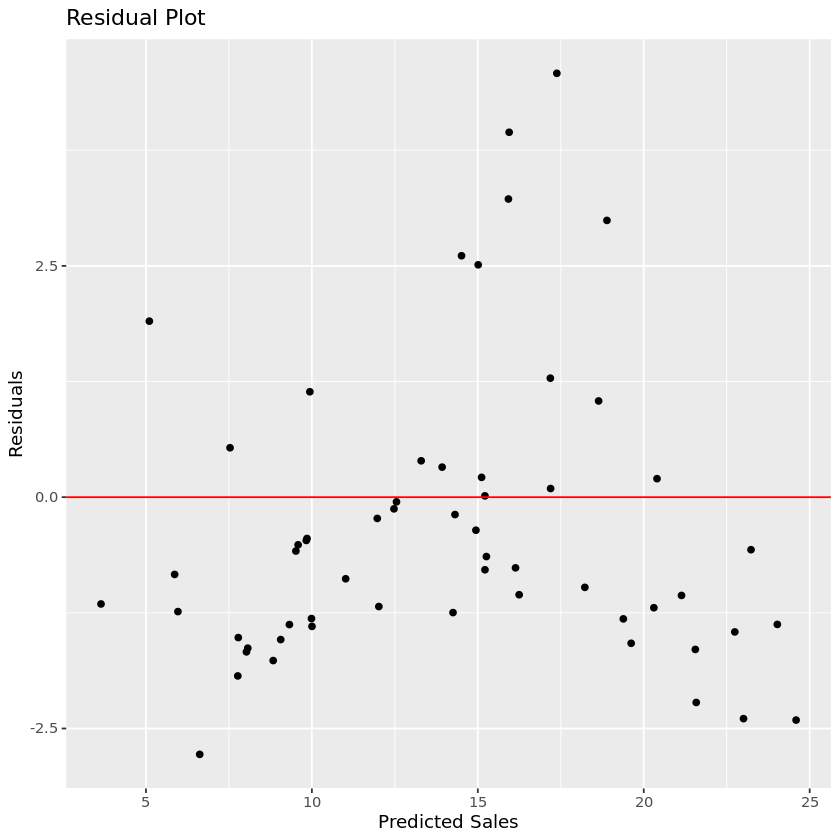

In [17]:
#Plot residuals for the test set
residuals2 <- predictions2 - testData$Sales
ggplot(data.frame(predictions2, residuals2), aes(x = predictions, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, color = 'red') +
  labs(title = "Residual Plot", x = "Predicted Sales", y = "Residuals")


In [18]:
#Check R-squared value on test data
cat("R-squared on Test Data:", 1 - sum(residuals2^2) / sum((testData$Sales - mean(testData$Sales))^2), "\n")

R-squared on Test Data: 0.9145414 


Now that we ran the new model after taking out the Newspaper Ad Budget, we can compare the performance of both models. The second model seems to perform pretty well, but it is slightly worse compared to the first model we ran. With the second model's performance, now we know we can make better sales from the ads if we include a budget for newspaper ads. 

## Closing Thoughts

Thank you for checking out my work! As always, any feedback is greatly appreciated since I'm still new to my machine learning journey.

## Author

V.B. Valdez